# Topic: Missing Values, Outliers, Categorical Data

## Task 1

In [38]:
# Import Pandas and alias it as pd.
# Import NumPy and alias it as np.

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the Titanic dataset:
# Load the 'titanic.csv' file using the Pandas library and assign it to a variable named 'data'.

data = pd.read_excel('/kaggle/input/train-16072024/train.xlsx')

In [40]:
# Explore the dataset:

# Display the first 5 rows of the dataset.
# Display the number of rows and columns in the dataset.
# Display the summary statistics of the dataset.

In [41]:
# Display the first 5 rows of the dataset.
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# Display the number of rows and columns in the dataset.
data.shape

(891, 12)

In [43]:
# Display the summary statistics of the dataset.
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.0,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681.0,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082.0,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7.0,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [44]:
# Handle missing values:

# Identify the columns with missing values.
# Impute missing values in the 'Age' column with the mean age of passengers.
# Impute missing values in the 'Embarked' column with the most frequent value.
# Drop the 'Cabin' column from the dataset

In [45]:
# Identify the columns with missing values.
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f"'{col}' column has {data[col].isnull().sum()} missing values")

'Age' column has 177 missing values
'Cabin' column has 687 missing values
'Embarked' column has 2 missing values


In [46]:
# Impute missing values in the 'Age' column with the mean age of passengers.
# Impute missing values in the 'Embarked' column with the most frequent value.
data['Age'].fillna(data['Age'].mean(),inplace=True)
print(f"After Imputing missing values in the 'Age' column with the mean age of passengers, 'Age' column has {data['Age'].isnull().sum()} missing values")
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
print(f"After Imputing missing values in the 'Embarked' column with the most frequent value, 'Embarked' column has {data['Embarked'].isnull().sum()} missing values")

After Imputing missing values in the 'Age' column with the mean age of passengers, 'Age' column has 0 missing values
After Imputing missing values in the 'Embarked' column with the most frequent value, 'Embarked' column has 0 missing values


In [47]:
# Drop the 'Cabin' column from the dataset
data.drop(columns=['Cabin'],inplace=True)
if 'Cabin' not in data.columns:
    print("Dropping the 'Cabin' column from the dataset is successful")
else:
    print("'Cabin' column is still present in the dataset")

Dropping the 'Cabin' column from the dataset is successful


## Tasks 2

In [48]:
# Handle categorical variables:
# Convert the 'Sex' column to numerical values,where 0 represents female and 1 represents male.
# Create dummy variables for the 'Embarked'column.

# Handle outliers:
# Identify the columns that may have outliers.
# Use appropriate techniques (e.g., Z-score, IQR) to identify and handle outliers in the dataset.

# Data validation:
# Check for duplicate rows in the dataset.
# Remove any duplicate rows, if present.

# Data transformation:
# Create a new column called 'FamilySize' by
# summing the 'SibSp' and 'Parch' columns.
# Create a new column called 'Title' by extracting the
# titles from the 'Name' column.

# Data normalization:
# Normalize Data using appropriate scaling techniques (e.g., Min-Max scaling, Standardization).
# Explain the Major Differences between Standardization and Normalization, and When to 
# use these Methods in real-world scenario based
# problems.

In [49]:
# Handle categorical variables:
# Convert the 'Sex' column to numerical values,where 0 represents female and 1 represents male.
# Create dummy variables for the 'Embarked'column.

def label_ecoder(col):
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(col)

    label_mapping = {label:index for index,label in enumerate(encoder.classes_)}
    
    print(f'label mapping of {col.name} column: {label_mapping}')
    
    return encoded_column,encoder


saved_encoders = {}

for col in ['Sex','Embarked']:
    encoded_column, encoder = label_ecoder(data[col])
    data[col] = encoded_column
    saved_encoders[col]=encoder
print(f'saved encoders: {saved_encoders}')

label mapping of Sex column: {'female': 0, 'male': 1}
label mapping of Embarked column: {'C': 0, 'Q': 1, 'S': 2}
saved encoders: {'Sex': LabelEncoder(), 'Embarked': LabelEncoder()}


In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


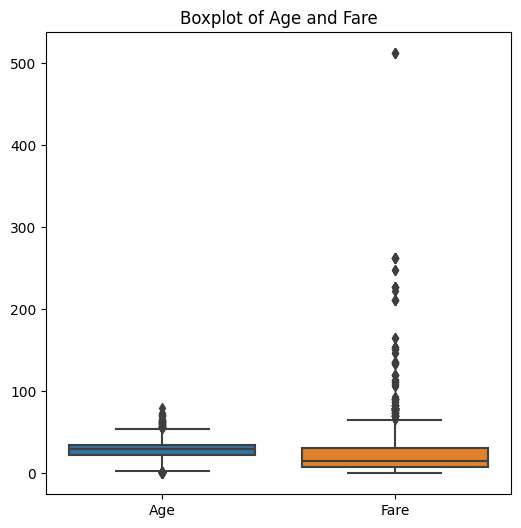

In [51]:
# Handle outliers:
# Identify the columns that may have outliers.
# Use appropriate techniques (e.g., Z-score, IQR) to identify and handle outliers in the dataset.
plt.figure(figsize=(6, 6))
sns.boxplot(data[['Age','Fare']])
plt.title('Boxplot of Age and Fare')
plt.show()

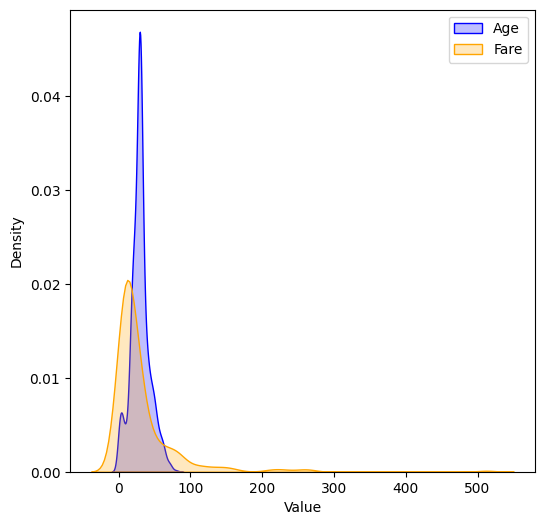

In [52]:
plt.figure(figsize=(6, 6))
sns.kdeplot(data['Age'], shade=True, label='Age', color='blue')
sns.kdeplot(data['Fare'], shade=True, label='Fare', color='orange')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

In [53]:
numerical_col = ['Age','Fare']
for col in numerical_col:
    outlier_count = ((zscore(data[col])>3) | (zscore(data[col])<-3)).sum()
    print(f"there are {outlier_count} outliers out of {data[col].count()} in '{col}' columns using Z-score method")

print('\n')
    
for col in numerical_col:
    first_quartile = data[col].quantile(0.25)
    third_quartile = data[col].quantile(0.75)
    iqr = third_quartile - first_quartile
    outlier_count = ((data[col]<first_quartile-1.5*iqr) | (data[col]>third_quartile+1.5*iqr)).sum()
    print(f"there are {outlier_count} outliers out of {data[col].count()} in '{col}' columns using Z-score method")

there are 7 outliers out of 891 in 'Age' columns using Z-score method
there are 20 outliers out of 891 in 'Fare' columns using Z-score method


there are 66 outliers out of 891 in 'Age' columns using Z-score method
there are 116 outliers out of 891 in 'Fare' columns using Z-score method


In [54]:
# handle outliers in the dataset
criteria_1 = (zscore(data['Age'])>3) | (zscore(data['Age'])<-3)
criteria_2 = (data['Fare']<first_quartile-1.5*iqr) | (data['Fare']>third_quartile+1.5*iqr)
data = data[~(criteria_1 | criteria_2)]
data.reset_index(drop=True,inplace= True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
3,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
4,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,1
...,...,...,...,...,...,...,...,...,...,...,...
764,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
765,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
766,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
767,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [55]:
# Data validation:
# Check for duplicate rows in the dataset.
# Remove any duplicate rows, if present.

if data.duplicated().sum() == 0:
    print(f'there are {data.duplicated().sum()} duplicated rows in dataset')
else:
    print(f'there are {data.duplicated().sum()} duplicated rows in dataset')
    data.drop_duplicates()
    print(f'after dropping duplicates there are {data.duplicated().sum()} duplicated rows in dataset')

there are 0 duplicated rows in dataset


In [56]:
# Data transformation:
# Create a new column called 'FamilySize' by summing the 'SibSp' and 'Parch' columns.
# Create a new column called 'Title' by extracting the titles from the 'Name' column.

data['FamilySize'] = data['SibSp'] + data['Parch']
data['Title'] = data['Name'].apply(lambda name: name.split(',')[1].split('.')[0])
data[['Title','FamilySize']]

,Title,FamilySize
0,Mr,1
1,Miss,0
2,Mrs,1
3,Mr,0
4,Mr,0
...,...,...
764,Rev,0
765,Miss,0
766,Miss,3
767,Mr,0


In [57]:
# Data normalization:
# Normalize Data using appropriate scaling techniques (e.g., Min-Max scaling, Standardization).


saved_scalers={}


scaler_standard = StandardScaler()
data['Age'] = scaler_standard.fit_transform(data[['Age']])
saved_scalers[data['Age'].name] = scaler_standard

scaler_minmax = MinMaxScaler()
data['Fare'] = scaler_minmax.fit_transform(data[['Fare']])
saved_scalers[data['Fare'].name] = scaler_minmax
    
print(saved_scalers)
print('Columns after scaling: ')
data[['Age','Fare']]

{'Age': StandardScaler(), 'Fare': MinMaxScaler()}
Columns after scaling: 


,Age,Fare
0,-0.553488,0.111538
1,-0.226142,0.121923
2,0.510386,0.816923
3,0.510386,0.123846
4,0.076581,0.130128
...,...,...
764,-0.144305,0.200000
765,-0.798997,0.461538
766,0.076581,0.360769
767,-0.226142,0.461538


### The Major Differences between Standardization and Normalization, and When to use these Methods in real-world scenario based problems.

Standardization: 

    This transforms the data to have a mean of 0 and a standard deviation of 1. 
    Centers the data around the mean, adjusting for the spread. It retains the original distribution shape.
    Useful when the data has varying scales and you want to retain the statistical properties
    Often used in algorithms that assume normally distributed data 
    Suitable for algorithms that rely on the mean and standard deviation 
        
Normalization: 

    This scales the data to a fixed range, typically [0, 1]. 
    Rescales the data to a specific range, altering the distribution shape based on the range limits.
    Useful when you want to bound the feature values to a specific range, which can be critical for algorithms that are sensitive to the range of input data
    Effective for distance-based algorithms where the scale of the features matters 

<!-- Data verification:
    
Validate the data after cleaning by performing the following checks.
1. Verify if there are any missing values remaining in
the dataset.

2. Verify if there are any outliers remaining in the
dataset.

3. Verify if the categorical variables have been
properly encoded.

4.Verify if the data has been properly normalized. -->

In [58]:
# Data verification:

# Validate the data after cleaning by performing the following checks.

# 1. Verify if there are any missing values remaining in the dataset.

# 2. Verify if there are any outliers remaining in the dataset.

# 3. Verify if the categorical variables have been properly encoded.

# 4.Verify if the data has been properly normalized

In [59]:
# 1. Verify if there are any missing values remaining in the dataset.
if data.isnull().sum().sum() == 0:
    print('There are no missing values remaining in the dataset')
else:
    print(f'There are {data.isnull().sum().sum()} missing values in the dataset')

There are no missing values remaining in the dataset


In [60]:
# 2. Verify if there are any outliers remaining in the dataset.
numerical_col = ['Age']
for col in numerical_col:
    outlier_count = ((zscore(data[col])>3) | (zscore(data[col])<-3)).sum()
    print(f"there are {outlier_count} outliers out of {data[col].count()} in '{col}' columns using Z-score method")

print('\n')
numerical_col = ['Fare']    
for col in numerical_col:
    first_quartile = data[col].quantile(0.25)
    third_quartile = data[col].quantile(0.75)
    iqr = third_quartile - first_quartile
    outlier_count = ((data[col]<first_quartile-1.5*iqr) | (data[col]>third_quartile+1.5*iqr)).sum()
    print(f"there are {outlier_count} outliers out of {data[col].count()} in '{col}' columns using Z-score method") 

there are 1 outliers out of 769 in 'Age' columns using Z-score method


there are 25 outliers out of 769 in 'Fare' columns using Z-score method


In [61]:
# 3. Verify if the categorical variables have been properly encoded.
print(data['Sex'].unique())
print(data['Embarked'].unique())

[1 0]
[2 1 0]


In [92]:
# 4.Verify if the data has been properly normalized
if ((data['Fare']>=1) & (data['Fare']<=0)).sum() == 0:
    print(f'All Values lies in the range 0 and 1 for {data["Fare"].name} column. Hence the data has been properly normalized')
else:
    print('the data is not properly normalized')
    
#If the data is properly standarised:
if abs(data['Age'].mean()>1e-6) or abs(data['Age'].std(ddof=0)-1>1e-6):
    print(f'The data is not properly properly standarised for {data["Age"].name} column')
else:
    print(f'The data is properly standarised for {data["Age"].name} column')

All Values lies in the range 0 and 1 for Fare column. Hence the data has been properly normalized
The data is properly standarised for Age column
